In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [17]:
df["Customer Name"].value_counts()

Seth                2
Walter              2
Caryn Hendrix       1
Len Phillips        1
Ferdinand Weber     1
                   ..
Kitra Kerr          1
Yen Santana         1
Emerald Hamilton    1
Reese Vance         1
Brian Mathews       1
Name: Customer Name, Length: 498, dtype: int64

In [19]:
#There are too many entries in the name column to convert them into dummy data so we will drop it same with the customer email
df = df.drop(["Customer Name" , "Customer e-mail"] , axis = 1)

In [20]:
df.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [23]:
df["Country"].value_counts()

USA    500
Name: Country, dtype: int64

In [24]:
#since we have all the houses in usa, it doesn't have a lot of effect on out purchase amount. So we'll drop it

df = df.drop("Country" , axis = 1)

In [25]:
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [30]:
#seeing what column has the most correlation with our target column

df.corrwith(df["Car Purchase Amount"]).sort_values(ascending=False)[1:]

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
dtype: float64

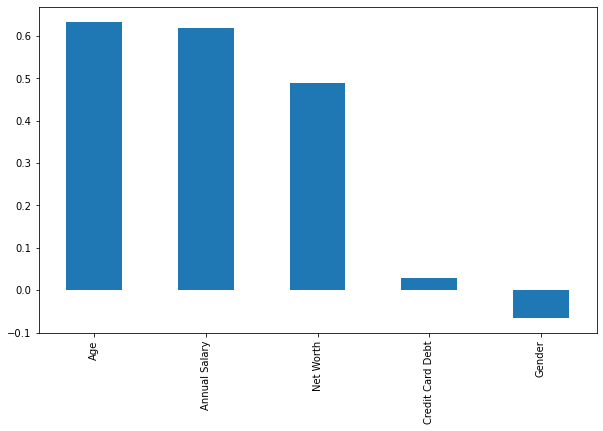

In [32]:
#age is the most related with the target column
plt.figure(figsize=(10,6))
df.corrwith(df["Car Purchase Amount"]).sort_values(ascending=False)[1:].plot(kind = "bar")

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('Car Purchase Amount' , axis = 1).values

In [36]:
y = df["Car Purchase Amount"].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Annual Salary        500 non-null    float64
 3   Credit Card Debt     500 non-null    float64
 4   Net Worth            500 non-null    float64
 5   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [49]:
df.shape

(500, 6)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [66]:
model = Sequential()


model.add(Dense(6 , activation = "relu"))
model.add(Dense(6 , activation = "relu"))
model.add(Dense(6 , activation = "relu"))
model.add(Dense(6 , activation = "relu"))

model.add(Dense(1))

In [67]:
model.compile(optimizer="adam" , loss="mse")

In [68]:
model.fit(x = X_train , y=y_train , validation_data=(X_test,y_test) , batch_size=100,epochs =400)

Epoch 1/400
4/4 [==============================] - 1s 55ms/step - loss: 2082459673.6000 - val_loss: 2032470528.0000
Epoch 2/400
4/4 [==============================] - 0s 14ms/step - loss: 2108436864.0000 - val_loss: 2032467968.0000
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 2129658086.4000 - val_loss: 2032465536.0000
Epoch 4/400
4/4 [==============================] - 0s 13ms/step - loss: 2088817024.0000 - val_loss: 2032463104.0000
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 2088134886.4000 - val_loss: 2032460544.0000
Epoch 6/400
4/4 [==============================] - 0s 15ms/step - loss: 2103558784.0000 - val_loss: 2032458112.0000
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 2071287910.4000 - val_loss: 2032455296.0000
Epoch 8/400
4/4 [==============================] - 0s 15ms/step - loss: 2051573094.4000 - val_loss: 2032452736.0000
Epoch 9/400
4/4 [==============================] - 0s 13ms/step - loss: 

4/4 [==============================] - 0s 14ms/step - loss: 2059434777.6000 - val_loss: 2022798592.0000
Epoch 72/400
4/4 [==============================] - 0s 14ms/step - loss: 2061981491.2000 - val_loss: 2022095360.0000
Epoch 73/400
4/4 [==============================] - 0s 14ms/step - loss: 2089129318.4000 - val_loss: 2021352192.0000
Epoch 74/400
4/4 [==============================] - 0s 17ms/step - loss: 2118913612.8000 - val_loss: 2020567040.0000
Epoch 75/400
4/4 [==============================] - 0s 15ms/step - loss: 2107892224.0000 - val_loss: 2019740672.0000
Epoch 76/400
4/4 [==============================] - 0s 15ms/step - loss: 2101809689.6000 - val_loss: 2018868992.0000
Epoch 77/400
4/4 [==============================] - 0s 14ms/step - loss: 2101032780.8000 - val_loss: 2017949312.0000
Epoch 78/400
4/4 [==============================] - 0s 13ms/step - loss: 2070384537.6000 - val_loss: 2016980736.0000
Epoch 79/400
4/4 [==============================] - 0s 15ms/step - loss: 2093

Epoch 141/400
4/4 [==============================] - 0s 16ms/step - loss: 1831906611.2000 - val_loss: 1744792576.0000
Epoch 142/400
4/4 [==============================] - 0s 15ms/step - loss: 1788811289.6000 - val_loss: 1735097216.0000
Epoch 143/400
4/4 [==============================] - 0s 21ms/step - loss: 1763537433.6000 - val_loss: 1725218176.0000
Epoch 144/400
4/4 [==============================] - 0s 23ms/step - loss: 1780560000.0000 - val_loss: 1715081984.0000
Epoch 145/400
4/4 [==============================] - 0s 21ms/step - loss: 1785095654.4000 - val_loss: 1704715008.0000
Epoch 146/400
4/4 [==============================] - 0s 27ms/step - loss: 1714689561.6000 - val_loss: 1694149760.0000
Epoch 147/400
4/4 [==============================] - 0s 23ms/step - loss: 1759777408.0000 - val_loss: 1683305984.0000
Epoch 148/400
4/4 [==============================] - 0s 25ms/step - loss: 1763250176.0000 - val_loss: 1672234752.0000
Epoch 149/400
4/4 [==============================] - 0s 

Epoch 211/400
4/4 [==============================] - 0s 13ms/step - loss: 677313817.6000 - val_loss: 623898560.0000
Epoch 212/400
4/4 [==============================] - 0s 13ms/step - loss: 653633843.2000 - val_loss: 606366400.0000
Epoch 213/400
4/4 [==============================] - 0s 14ms/step - loss: 676018355.2000 - val_loss: 588856512.0000
Epoch 214/400
4/4 [==============================] - 0s 13ms/step - loss: 658333644.8000 - val_loss: 571630144.0000
Epoch 215/400
4/4 [==============================] - 0s 11ms/step - loss: 608861747.2000 - val_loss: 554760064.0000
Epoch 216/400
4/4 [==============================] - 0s 12ms/step - loss: 588618419.2000 - val_loss: 538033024.0000
Epoch 217/400
4/4 [==============================] - 0s 13ms/step - loss: 582071180.8000 - val_loss: 521462976.0000
Epoch 218/400
4/4 [==============================] - 0s 67ms/step - loss: 575489868.8000 - val_loss: 505163328.0000
Epoch 219/400
4/4 [==============================] - 0s 17ms/step - loss

Epoch 282/400
4/4 [==============================] - 0s 20ms/step - loss: 101354904.0000 - val_loss: 69682256.0000
Epoch 283/400
4/4 [==============================] - 0s 20ms/step - loss: 102504481.6000 - val_loss: 69067000.0000
Epoch 284/400
4/4 [==============================] - 0s 17ms/step - loss: 96667883.2000 - val_loss: 68500368.0000
Epoch 285/400
4/4 [==============================] - 0s 21ms/step - loss: 95735232.0000 - val_loss: 67977536.0000
Epoch 286/400
4/4 [==============================] - 0s 22ms/step - loss: 97075166.4000 - val_loss: 67492688.0000
Epoch 287/400
4/4 [==============================] - 0s 20ms/step - loss: 93260968.0000 - val_loss: 67054320.0000
Epoch 288/400
4/4 [==============================] - 0s 16ms/step - loss: 93716436.8000 - val_loss: 66632868.0000
Epoch 289/400
4/4 [==============================] - 0s 18ms/step - loss: 97566737.6000 - val_loss: 66236008.0000
Epoch 290/400
4/4 [==============================] - 0s 18ms/step - loss: 97502078.400

Epoch 354/400
4/4 [==============================] - 0s 20ms/step - loss: 81962472.0000 - val_loss: 56708860.0000
Epoch 355/400
4/4 [==============================] - 0s 19ms/step - loss: 78911932.8000 - val_loss: 56604684.0000
Epoch 356/400
4/4 [==============================] - 0s 17ms/step - loss: 80084846.4000 - val_loss: 56499328.0000
Epoch 357/400
4/4 [==============================] - 0s 17ms/step - loss: 77506411.2000 - val_loss: 56395776.0000
Epoch 358/400
4/4 [==============================] - 0s 16ms/step - loss: 78400246.4000 - val_loss: 56291748.0000
Epoch 359/400
4/4 [==============================] - 0s 17ms/step - loss: 82123140.8000 - val_loss: 56187024.0000
Epoch 360/400
4/4 [==============================] - 0s 19ms/step - loss: 84451350.4000 - val_loss: 56084464.0000
Epoch 361/400
4/4 [==============================] - 0s 16ms/step - loss: 75618495.2000 - val_loss: 55983628.0000
Epoch 362/400
4/4 [==============================] - 0s 16ms/step - loss: 79065964.8000 

In [69]:
losses = pd.DataFrame(model.history.history)

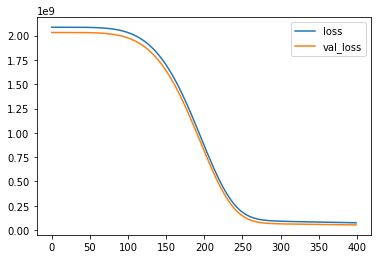

In [70]:
losses.plot()

In [60]:
one_point = df.drop("Car Purchase Amount",axis = 1).iloc[0]

In [63]:
one_point = one_point.values.reshape(-1,5)

In [64]:
model.predict(scaler.transform(one_point))

array([[37843.938]], dtype=float32)

In [65]:
df.iloc[0]

Gender                      0.00000
Age                        42.00000
Annual Salary           62812.09301
Credit Card Debt        11609.38091
Net Worth              238961.25050
Car Purchase Amount     35321.45877
Name: 0, dtype: float64